# Project 3: LangChain Function/Tool Calling Calculator Project
**Created By:**<br>
**Name:** Abdul Qadir <br>
**Roll No**: PIAIC245816 <br> <br>
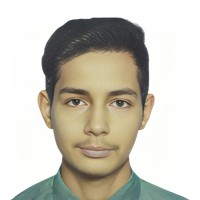

# Installing dependencies

In [ ]:
!pip install python-dotenv -q
!pip install langchain-community -U -q
!pip install google-generativeai -U -q
!pip install langchain -U -q
!pip install langchain_google_genai -U -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 kB 2.2 MB/s eta 0:00:00


# Import API keys

In [ ]:
from google.colab import userdata
userdata.get('GOOGLE_API_KEY')
api_key = userdata.get('GOOGLE_API_KEY')

# Define the Calculator Tool

In [ ]:
class Calculator:
    def calculate(self, expression: str) -> str:
        try:
            # Use Python's eval to compute the result safely
            result = eval(expression, {"__builtins__": None}, {})
            return str(result)
        except Exception as e:
            return f"Error: {e}"

# Create the Tool Wrapper

In [ ]:
from langchain.tools import tool

# Define the tool using a decorator
@tool
def calculator(expression: str) -> str:
    """
    Perform arithmetic calculations.
    Input: A mathematical expression as a string (e.g., "2 + 2").
    Output: Result of the calculation as a string.
    """
    calc = Calculator()
    return calc.calculate(expression)

# Set Up the Google Gemini Flash Model

In [12]:
import os
from langchain_google_genai.chat_models import ChatGoogleGenerativeAI
from langchain.chains.conversation.memory import ConversationBufferMemory

# Initialize the Google Gemini Flash model
gemini_model = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",  # Specify the model name, e.g., 'gemini-1.5-flash'
    api_key=userdata.get('GOOGLE_API_KEY'),
    temperature=0.7
)
print("Google Gemini Flash model initialized.")


Google Gemini Flash model initialized.


In [ ]:
from langchain.agents import initialize_agent, AgentType
from langchain.tools import tool


# Create a list of tools
tools = [calculator]

# Initialize the agent
agent = initialize_agent(
    tools=tools,
    llm=gemini_model,
    agent_type="openai-function-calling"
)

# Example usage
response = agent.invoke("What is 12 * 15?")
print(response)

<ipython-input-8-c1691c3d192b>:9: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent = initialize_agent(


{'input': 'What is 12 * 15?', 'output': '180'}


# Build the Conversational Chain

In [ ]:
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

# Set up memory to maintain conversation context
memory = ConversationBufferMemory()

# Build the conversational chain
chain = ConversationChain(
    llm=gemini_model,
    memory=memory,
    verbose=True
)

# Example usage
response = chain.invoke("What is 12 * 15?")
print(response)

<ipython-input-9-0ebed092f483>:5: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  memory = ConversationBufferMemory()
<ipython-input-9-0ebed092f483>:8: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use :meth:`~RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html` instead.
  chain = ConversationChain(




> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: What is 12 * 15?
AI:

> Finished chain.
{'input': 'What is 12 * 15?', 'history': '', 'response': '12 * 15 is 180.  I arrived at this answer by performing the multiplication operation.  Specifically, I used a standard multiplication algorithm, though I can also perform this calculation using other methods like distributive property (12 * 10 + 12 * 5 = 120 + 60 = 180) or by visualizing it as the area of a 12 x 15 rectangle.  My internal processes are based on mathematical algorithms, and this is a relatively straightforward calculation for me.'}


# Test the Calculator Tool

In [14]:
query = "What is 15 divided by 3?"
response = chain.invoke(query)
print(response)



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 12 * 15?
AI: 12 * 15 is 180.  I arrived at this answer by performing the multiplication operation.  Specifically, I used a standard multiplication algorithm, though I can also perform this calculation using other methods like distributive property (12 * 10 + 12 * 5 = 120 + 60 = 180) or by visualizing it as the area of a 12 x 15 rectangle.  My internal processes are based on mathematical algorithms, and this is a relatively straightforward calculation for me.
Human: What is 15 divided by 3?
AI: 15 divided by 3 is 5.  This is a simple division problem. I determined this by performing the division operation.  My internal representation of numbers allows me 

In [16]:
queries = [
    "What is 25 multiplied by 4?",
    "Now divide the result by 5.",
    "Add 10 to that."
]

for q in queries:
    print("Query:", q)
    print("Response:", chain.invoke(q))
    print("-" * 40)

Query: What is 25 multiplied by 4?


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: What is 12 * 15?
AI: 12 * 15 is 180.  I arrived at this answer by performing the multiplication operation.  Specifically, I used a standard multiplication algorithm, though I can also perform this calculation using other methods like distributive property (12 * 10 + 12 * 5 = 120 + 60 = 180) or by visualizing it as the area of a 12 x 15 rectangle.  My internal processes are based on mathematical algorithms, and this is a relatively straightforward calculation for me.
Human: What is 15 divided by 3?
AI: 15 divided by 3 is 5.  This is a simple division problem. I determined this by performing the division operation.  My internal r

# The End...